In [47]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [48]:
df = pd.read_csv('C:\\Users\\Administrador\\Desktop\\Data Scientist\\Data Science\\Proyecto\\GitHub\\Proyecto_DataScience_Coder\\data\\BTC_Data_final.csv')
print(df.dtypes)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtypes)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Date                       object
priceUSD                  float64
size                      float64
sentbyaddress               int64
transactions                int64
mining_profitability      float64
sentinusd                 float64
transactionfees           float64
median_transaction_fee    float64
confirmationtime          float64
marketcap                   int64
transactionvalue          float64
mediantransactionvalue    float64
tweets                      int64
google_trends             float64
fee_to_reward             float64
activeaddresses             int64
top100cap                 float64
dtype: object
datetime64[ns]


In [49]:
df.head(1)

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,Year,Month
0,2014-04-09,447.11,243742.0,122401,64992,38.678,239212041.0,0.139,0.0447,8.944,5587996110,4115.0,100.42,8193,11.193,0.502,179274,19.211,2014,4


Text(0.5, 1.0, 'Grafico precio BTC')

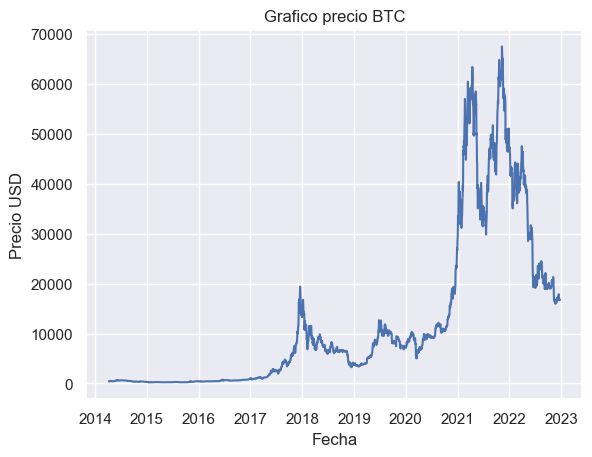

In [50]:
fig, ax = plt.subplots()
x = df.Date
y = df.priceUSD
ax.plot(x, y, label='Precio BTC')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.set_title('Grafico precio BTC')


En este grafico se muestra la evolución del precio de Bitcoin desde sus inicios en el año 2014 hasta fin del año 2022.

Actualmente el precio se encuentra lateralizando en el entorno de los USD 20.000 generando expectativa en todos sus inversores.


In [51]:
df['marketcap_en_MM'] = df.apply(lambda row: row.marketcap / 1000000000, axis=1)
df.head()

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,...,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,Year,Month,marketcap_en_MM
0,2014-04-09,447.110,243742.0,122401,64992,38.678,239212041.0,0.1390,0.0447,8.944,...,4115.0,100.420,8193,11.193,0.502,179274,19.211,2014,4,5.587996
1,2014-04-10,407.703,254334.0,124298,67872,31.917,310367120.0,0.0864,0.0408,9.290,...,4876.0,120.946,15039,13.854,0.371,182996,19.166,2014,4,5.020360
2,2014-04-11,403.328,223656.0,117926,65563,36.814,292756343.0,0.0858,0.0403,8.521,...,4819.0,108.481,14907,12.997,0.330,169622,19.141,2014,4,5.068920
3,2014-04-12,425.310,169964.0,87828,47579,34.498,157264741.0,0.0811,0.0425,8.944,...,3574.0,84.408,7582,9.229,0.226,132283,19.145,2014,4,5.329088
4,2014-04-13,415.876,162260.0,94828,50981,34.141,154756367.0,0.0840,0.0416,7.701,...,3332.0,69.681,10674,10.385,0.221,172708,19.131,2014,4,5.150415


Text(0.5, 1.0, 'Capitalizacion de mercado de BTC expresada en USD Miles de Millones')

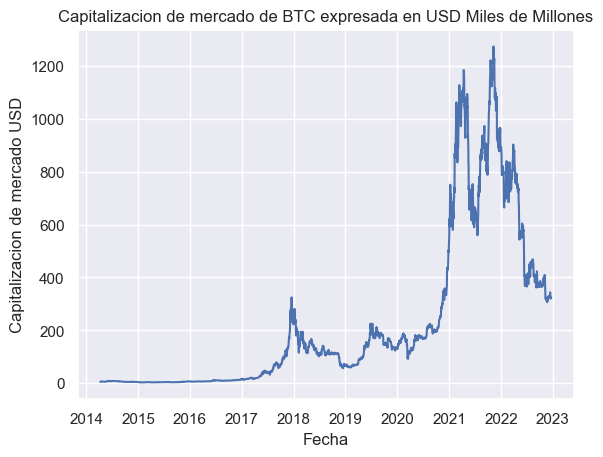

In [52]:
fig, ax = plt.subplots()
x = df.Date
y = df.marketcap_en_MM
ax.plot(x, y, label='Capitalizacion de mercado de BTC expresada en USD Miles de Millones')
ax.set_xlabel('Fecha')
ax.set_ylabel('Capitalizacion de mercado USD')
ax.set_title('Capitalizacion de mercado de BTC expresada en USD Miles de Millones')

Este grafico representa la capitalización de mercado de BTC, como se puede apreciar, posee un dibujo similar al anterior, reflejando que la capitalización de mercado va directamente asociada al precio del activo.

Podemos afirmar que ante bajas en el precio, los inversores intentan resguardar su patrimonio quitándolo de BTC, mientras que las subas en el precio del activo atraen a nuevos inversores haciendo crecer la capitalización de mercado de BTC.

Text(0.5, 1.0, 'Evolucion historica de transacciones con BTC')

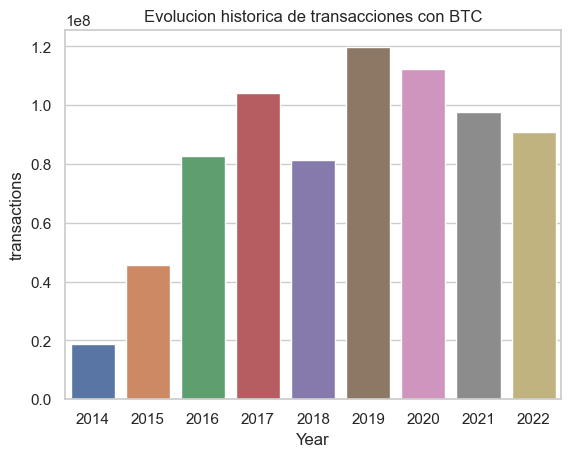

In [53]:
df_tran = df.groupby(['Year'])['transactions'].sum().reset_index()
df_tran.head(10)

sns.set_theme(style="whitegrid")

ax = sns.barplot(x="Year", y="transactions", data=df_tran)
ax.set_title('Evolucion historica de transacciones con BTC')

En este caso se analiza la evolución histórica de transacciones realizadas en la blockchain de Bitcoin. Se puede ver que hasta el año 2019 se dio un crecimiento grande en este índice, y en 2020 ha comenzado un retroceso en la cantidad de transacciones anuales, lo cual puede responder a la inestabilidad en el precio del activo.

In [54]:
df_tran.head(10)



,Year,transactions
0,2014,18951966
1,2015,45618870
2,2016,82571772
3,2017,104010023
4,2018,81340729
5,2019,119726948
6,2020,112497226
7,2021,97743767
8,2022,90826733


C:\Users\Administrador\AppData\Local\Temp\ipykernel_15132\1157766332.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_price_order1 = df_price_order.pivot("Month", "Year", "priceUSD")


<AxesSubplot: xlabel='Year', ylabel='Month'>

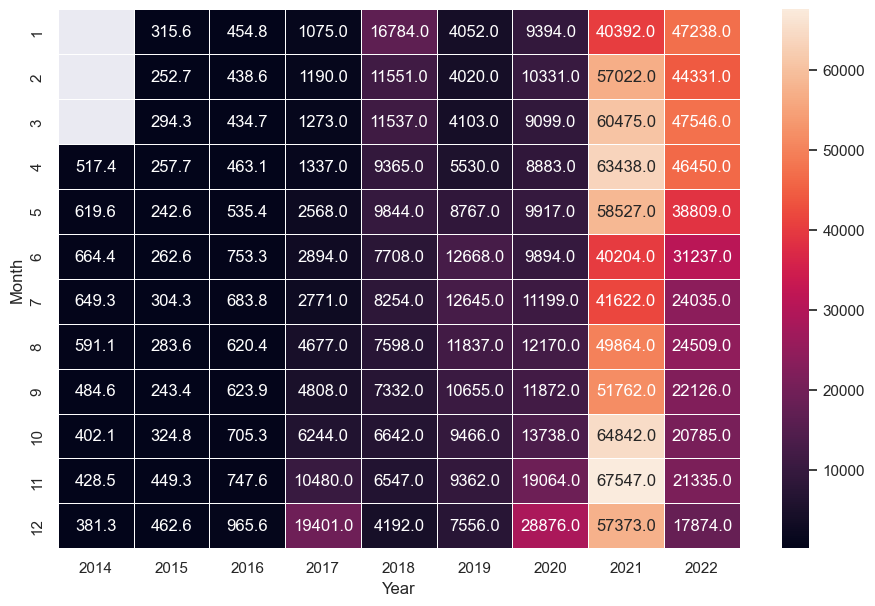

In [55]:
df_price_order = df.groupby(['Year', 'Month'])['priceUSD'].max().reset_index()

sns.set_theme()

df_price_order1 = df_price_order.pivot("Month", "Year", "priceUSD")

f, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(df_price_order1, annot=True, fmt=".1f", linewidths=.5, ax=ax)

El siguiente HeatMap muestra los precios máximos que ha tenido Bitcoin en cada mes de cada año desde su creación.

Podemos ver que su precio más alto fue visto en el mes de noviembre de 2021, cuando alcanzó el monto de USD 67.547

<AxesSubplot: xlabel='Year', ylabel='sentin_Musd'>

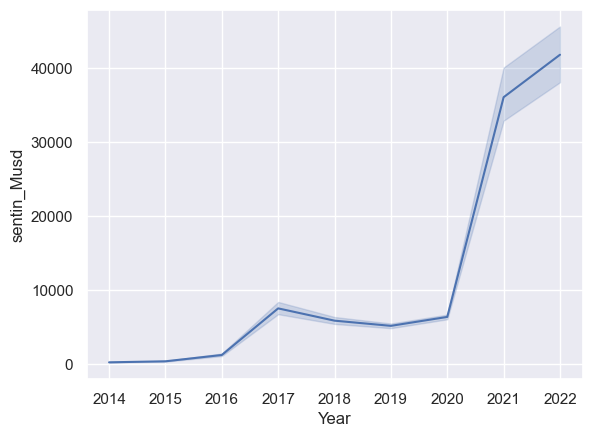

In [59]:
df['sentin_Musd'] = df['sentinusd'] / 1000000
df.head(3)

sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="sentin_Musd", data=df)



En este grafico se analiza la cantidad de transacciones enviadas en BTC cotizadas en USD.

Es impactante como el valor de las transacciones han ido creciendo año a año, con una tendencia clara a seguir en aumento.

In [ ]:
df_LastYears = df.query('Year == (2019, 2020, 2021, 2022)')
df_LastYears.sample(3)

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,...,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,Year,Month,marketcap_en_MM
1959,2019-08-20,10758.0,789175.0,419942,333151,0.266,5.134381e+09,1.508,0.715,9.412,...,314724.0,292.722,16596,46.541,2.384,624794,14.389,2019,8,192.427871
2163,2020-03-11,7856.0,814438.0,416528,287373,0.111,5.970077e+09,0.808,0.356,12.101,...,46282.0,343.729,23550,45.002,1.949,645946,14.944,2020,3,143.487379
2255,2020-06-11,9659.0,842674.0,534703,332305,0.103,6.647777e+09,1.122,0.517,7.784,...,29079.0,443.508,34444,48.039,3.232,907646,14.740,2020,6,177.736521


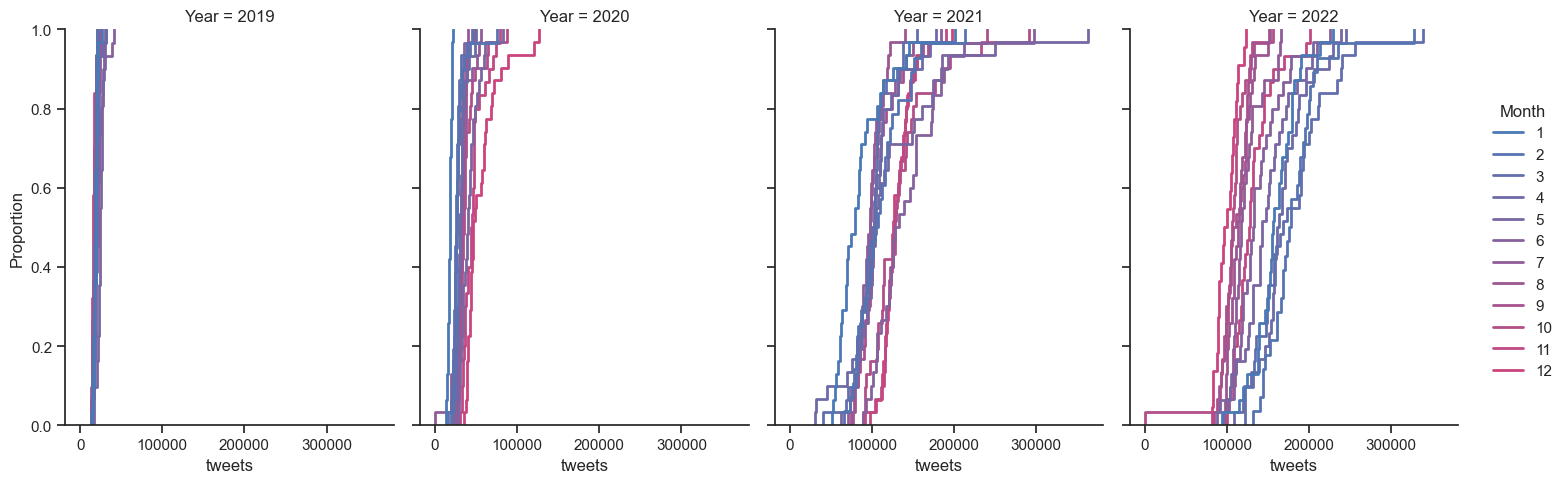

In [ ]:
sns.set_theme(style="ticks")
mpg = df_LastYears

colors = (250, 70, 50), (350, 70, 50)
cmap = sns.blend_palette(colors, input="husl", as_cmap=True)

sns.displot(
    mpg,
    x="tweets", col="Year", hue="Month",
    kind="ecdf", aspect=.75, linewidth=2, palette=cmap,
)

Finalmente, en este grafico se analiza la presencia en redes sociales de la temática Bitcoin, puntualmente se toman datos de la cantidad de tweets realizados mes a mes en los últimos 4 años.

Vemos que en general los primeros meses del año son los que mayor cantidad de menciones sobre BTC se realizan en tweeter. 
